In [5]:
import numpy as np
import pandas as pd

In [6]:
try:
    df = pd.read_csv('spam.csv', encoding='latin1')
except UnicodeDecodeError:
   
    try:
        df = pd.read_csv('spam.csv', encoding='iso-8859-1')
    except UnicodeDecodeError:
        
        df = pd.read_csv('spam.csv', encoding='utf-16')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1707,ham,Was doing my test earlier. I appreciate you. W...,NaN,NaN,NaN
3066,ham,Ok. So april. Cant wait,NaN,NaN,NaN
2824,spam,Congratulations - Thanks to a good friend U ha...,NaN,NaN,NaN
92,ham,Smile in Pleasure Smile in Pain Smile when tro...,NaN,NaN,NaN
4275,ham,Can you please send me my aunty's number,NaN,NaN,NaN


In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [ ]:
# data cleaning
# Exponantary data analysis
# Text Preprocessing
#  Model building
# evaluation
# improvement depending of evaluation
# create website
# deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
287,ham,hi baby im cruisin with my girl friend what r ...
2414,ham,O was not into fps then.
1847,spam,FREE NOKIA Or Motorola with upto 12mths 1/2pri...
1500,ham,Host-based IDPS for linux systems.
5060,ham,"Sorry, I'll call you later. I am in meeting sir."


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
740,ham,Yes i will be there. Glad you made it.
5119,ham,Lol for real. She told my dad I have cancer
5254,ham,I didnt get anything da
5331,ham,X course it 2yrs. Just so her messages on mess...
2471,ham,"sry can't talk on phone, with parents"


In [10]:
# apply level encoder for changing the value of ham and spam
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.sample(5)

,target,text
1347,0,She doesnt need any test.
2142,0,You see the requirements please
2130,0,Later i guess. I needa do mcat study too.
1412,0,"Wen ur lovable bcums angry wid u, dnt take it ..."
2258,0,Sad story of a Man - Last week was my b'day. M...


In [13]:
# checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check for duplicate values
df.duplicated().sum()

403

In [18]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

## 2. EDA

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
# checking the ratio ham and spam data
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

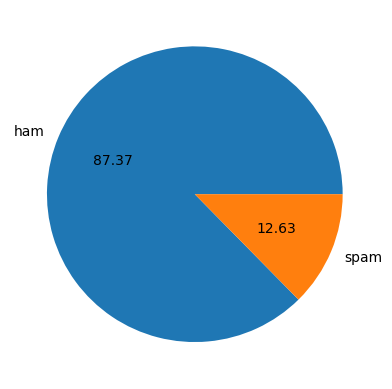

In [26]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

# for hiding unneccesary code

plt.show()

In [27]:
# data is imbalanced

In [23]:
# NLTK, or Natural Language Toolkit, is a Python package that you can use for NLP. 
# A lot of the data that you could be analyzing is unstructured data and contains human-readable text. 
# Before you can analyze that data programmatically, you first need to preprocess it.

import nltk

In [31]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROUNIK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# for deep analyzing [ create cols ( no of character in sms , no of word , no of sentences )]
df['num_characters'] = df['text'].apply(len)

In [20]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# no of words

df['no_words'] = df['text'].apply(lambda z:len(nltk.word_tokenize(z)))

In [41]:
df.head()

,target,text,num_characters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['no_sentences'] = df['text'].apply(lambda y:len(nltk.sent_tokenize(y)))

In [27]:
df.head()

,target,text,num_characters,no_words,no_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','no_words','no_sentences']].describe()

,num_characters,no_words,no_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# differentiate ham and spam analysis
df[df['target'] == 0][['num_characters','no_words','no_sentences']].describe()

,num_characters,no_words,no_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['target'] == 1][['num_characters','no_words','no_sentences']].describe()

,num_characters,no_words,no_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [86]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

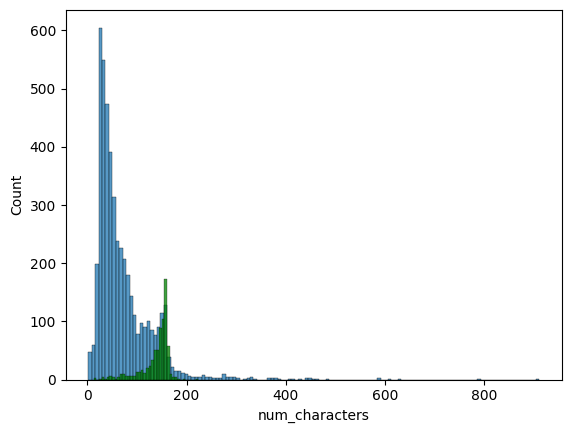

In [34]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'green')

<Axes: xlabel='no_words', ylabel='Count'>

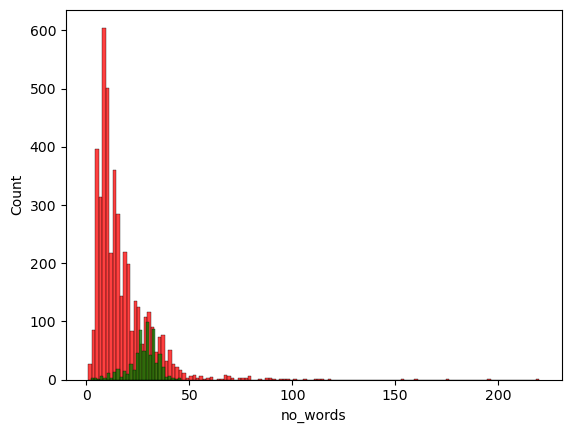

In [51]:
sns.histplot(df[df['target'] == 0]['no_words'],color = 'red')
sns.histplot(df[df['target'] == 1]['no_words'],color = 'green')

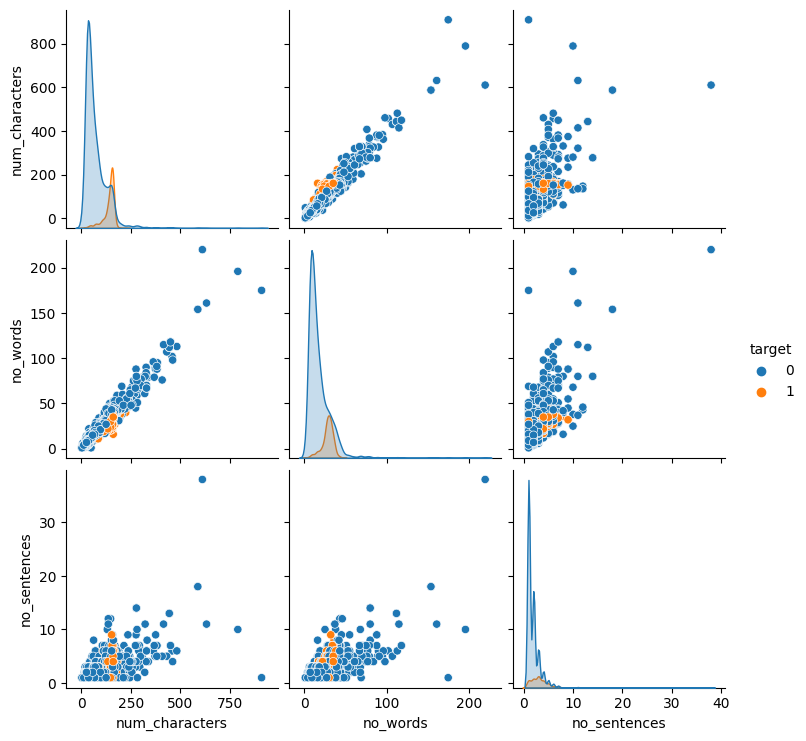

In [35]:
# using pairplot for relation between no_words and num_characters
sns.pairplot(df,hue='target')

In [36]:
# co relation coefficient

# Assuming 'df' is your DataFrame, you can specify only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])



In [37]:
numeric_df.corr()

,target,num_characters,no_words,no_sentences
target,1.000000,0.387285,0.263221,0.265332
num_characters,0.387285,1.000000,0.966310,0.631881
no_words,0.263221,0.966310,1.000000,0.685165
no_sentences,0.265332,0.631881,0.685165,1.000000


<Axes: >

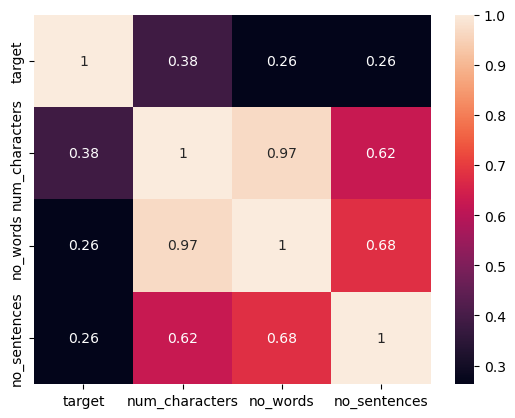

In [59]:
sns.heatmap(numeric_df.corr(),annot=True)

# 3. Data Preprocessing
    
    lower case
    Tokenization
    Removing special characters
    Removing stop words and punctuation
    Stemming

In [47]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text :
        y.append(ps.stem(i))
    
    # convert to a string
    return  " ".join(y)

In [63]:
transform_text("HI hELLO how ARE YOU")

'hi hello how are you'

In [406]:
transform_text("HI hELLO how ARE ## YOU ... !!! rounik loved dancing")

'hi hello rounik love danc'

In [46]:
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [40]:
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords data
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROUNIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [49]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [50]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5572, dtype: object

In [55]:
df['transform_text'] = df['text'].apply(transform_text)

In [56]:
df.head()

,target,text,num_characters,no_words,no_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
# creating a word cloud 
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


In [68]:
spam_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

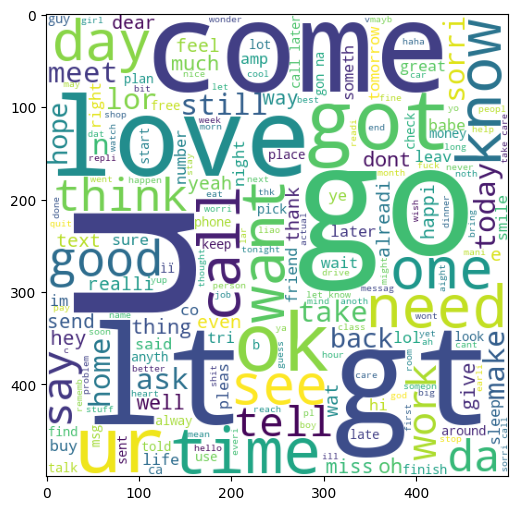

In [70]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [64]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

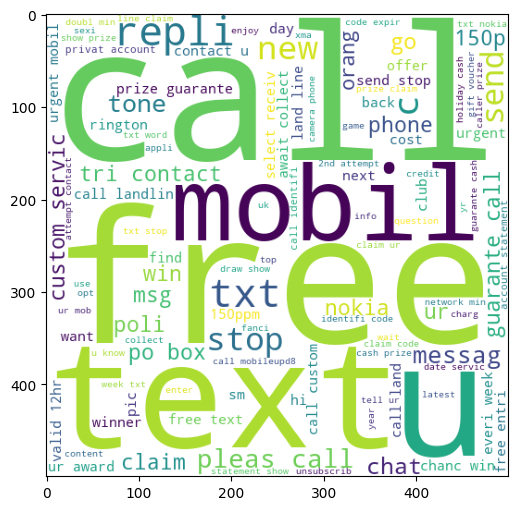

In [67]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [71]:
df.head()

,target,text,num_characters,no_words,no_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [76]:
# identify most common word

spam_corpus = []
for msg in df[df['target'] == 1 ]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [77]:
len(spam_corpus)

11490

In [79]:
# list convert to the dictionary

from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 365),
 ('free', 219),
 ('2', 174),
 ('txt', 169),
 ('ur', 144),
 ('u', 141),
 ('text', 139),
 ('mobil', 135),
 ('4', 120),
 ('claim', 115),
 ('stop', 114),
 ('repli', 112),
 ('prize', 94),
 ('get', 88),
 ('tone', 74),
 ('servic', 72),
 ('send', 70),
 ('new', 69),
 ('nokia', 68),
 ('award', 66),
 ('week', 62),
 ('cash', 62),
 ('urgent', 62),
 ('win', 61),
 ('contact', 61),
 ('pleas', 57),
 ('phone', 57),
 ('c', 51),
 ('custom', 51),
 ('collect', 51)]

In [91]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


## 4. Model Building

In [391]:
# Naive Bayes
# text convert to vector
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4200)
# tfidf = TfidfVectorizer()

In [392]:
#convert sparse array to dence array
X = tfidf.fit_transform(df['transform_text']).toarray()

In [393]:
X.shape

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# appending the num_characters col to x
# X = np.hstack((X,df['no_words'].values.reshape(-1,1)))

(5572, 4200)

In [394]:
y = df['target'].values

In [395]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [396]:
from sklearn.model_selection import train_test_split

In [397]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [398]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [399]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [400]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135


In [401]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9632286995515695
[[957   0]
 [ 41 117]]
1.0


In [402]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9721973094170404
[[955   2]
 [ 29 129]]
0.9847328244274809


In [403]:
# tfidf --> MultinomialNB

In [274]:
# model improvement
# 1. change the max_features parameter of TfIdf (improving accuracy)
# 2. scaling value of X using MinMaxScaler (improving accuracy but decrease precision_score)
# 3. add num_characters as a input (decrease the accuracy)

# VotingClassifier 
# stacking

In [404]:
# new email
# 1. transform email text
# 2. vectorize
# 3. apply algorithm

In [405]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))